## Supplement 7: Unsupervised Learning

In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import skimage
import matplotlib.pyplot as plt
from PIL import Image


### 7.3 Programming Task: Color Quantization using K-Means clustering.

 The goal of this task is to perform color quantization using the K-Means clustering algorithm.

   i\. Implement the K-Means clustering algorithm using Numpy/SciPy.




In [2]:
def K_means_clustering(train_X, k=8, max_iters=100):
    np.random.seed(42)  
    initial_indices = np.random.choice(train_X.shape[0], k, replace=False)
    cluster_centers = train_X[initial_indices, :]

    for iteration in range(max_iters):
        distances = np.sqrt(((train_X[:, np.newaxis, :] - cluster_centers[np.newaxis, :, :]) ** 2).sum(axis=2))
        closest_cluster_ids = np.argmin(distances, axis=1)
        new_cluster_centers = np.array([train_X[closest_cluster_ids == i].mean(axis=0) for i in range(k)])
        if np.all(new_cluster_centers == cluster_centers):
            cluster_centers = new_cluster_centers
    return cluster_centers

   ii\. Read the given image. Consider each pixel as a 3-dimensional vector and run your K-Means clustering algorithm to get 64 clusters.


In [6]:
# Load the image
image_path = "C:\\Users\\49177\\Pictures\\sup_7_3_input.jpg"
image = Image.open(image_path)
image_rgb = image.convert('RGB')
pixels = np.array(image_rgb).reshape(-1, 3)
cluster_centers = K_means_clustering(pixels)

  iii\. Assign each pixel the color value of its nearest cluster center. Visualize the result.

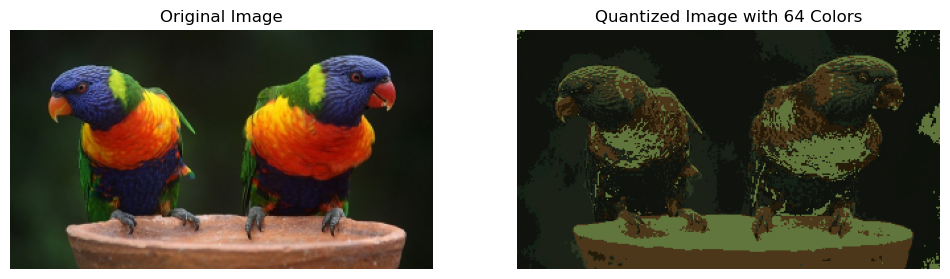

In [7]:
def assign_clusters(pixels, cluster_centers):
    distances = np.linalg.norm(pixels[:, None] - cluster_centers[None, :], axis=2)
    nearest_clusters = np.argmin(distances, axis=1)
    return cluster_centers[nearest_clusters]

new_pixels = assign_clusters(pixels, cluster_centers)
new_image_data = new_pixels.reshape(image_rgb.size[1], image_rgb.size[0], 3)
new_image = Image.fromarray(new_image_data.astype('uint8'), 'RGB')

plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Quantized image
plt.subplot(1, 2, 2)
plt.imshow(new_image)
plt.title('Quantized Image with 64 Colors')
plt.axis('off')

plt.show()